In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\hs081\\Downloads\\diabetes_prediction_dataset.csv\\diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
df.shape

(100000, 9)

In [7]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
df.duplicated().sum()

3854

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [13]:
df.shape

(96146, 9)

In [14]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [15]:
[features for features in df.columns if df[features].dtype  == 'O']

['gender', 'smoking_history']

In [16]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
encoder = OrdinalEncoder(categories=[['Female' , 'Male'  , 'Other']])

In [19]:
df['gender'] = encoder.fit_transform(df[['gender']])

In [20]:
df['gender'] = df['gender'].astype(int)

In [21]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0


In [22]:
df.dtypes

gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [23]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [24]:
encoder = OrdinalEncoder(categories= [['never', 'No Info', 'current', 'former', 'ever', 'not current']])

In [25]:
df['smoking_history'] = encoder.fit_transform(df[['smoking_history']])

In [26]:
df['smoking_history'] = df['smoking_history'].astype(int)

In [27]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0


In [28]:
df.dtypes

gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [29]:
df.to_csv('Diabetes Csv file cleaned.csv')

# EDA on Diabetes dataset

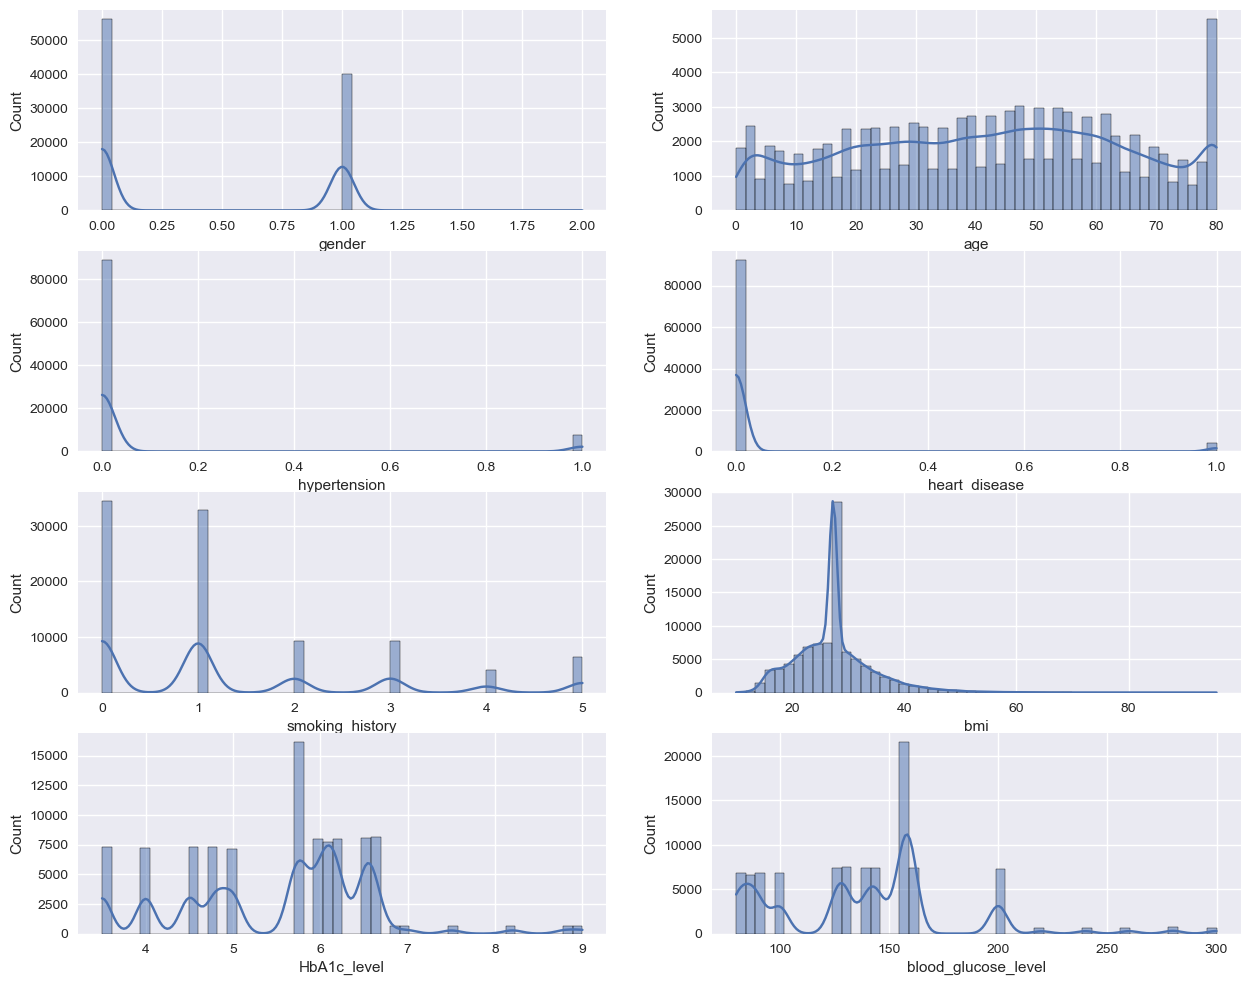

In [30]:
plt.style.use('seaborn')
plt.subplots(figsize= (15, 12))
row = 4 
col = 2 
start = 1
for i in df.columns:
    if(i != 'diabetes'):
        plt.subplot(row , col , start)
        sns.histplot(x = i , bins = 50 , kde = True , data = df)
    start = start + 1
        

In [31]:
#lets check the output feature

In [32]:
df['gender'].value_counts()

0    56161
1    39967
2       18
Name: gender, dtype: int64

In [33]:
df[df['gender'] == 2]['diabetes'].value_counts()
#we have to drop the other parameter from the gender

0    18
Name: diabetes, dtype: int64

In [34]:
df = df[df['gender'] != 2]

In [35]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0


In [36]:
percentage = df['gender'].value_counts()

In [37]:
percentage

0    56161
1    39967
Name: gender, dtype: int64

In [38]:
lab = ['Female' , 'Male']

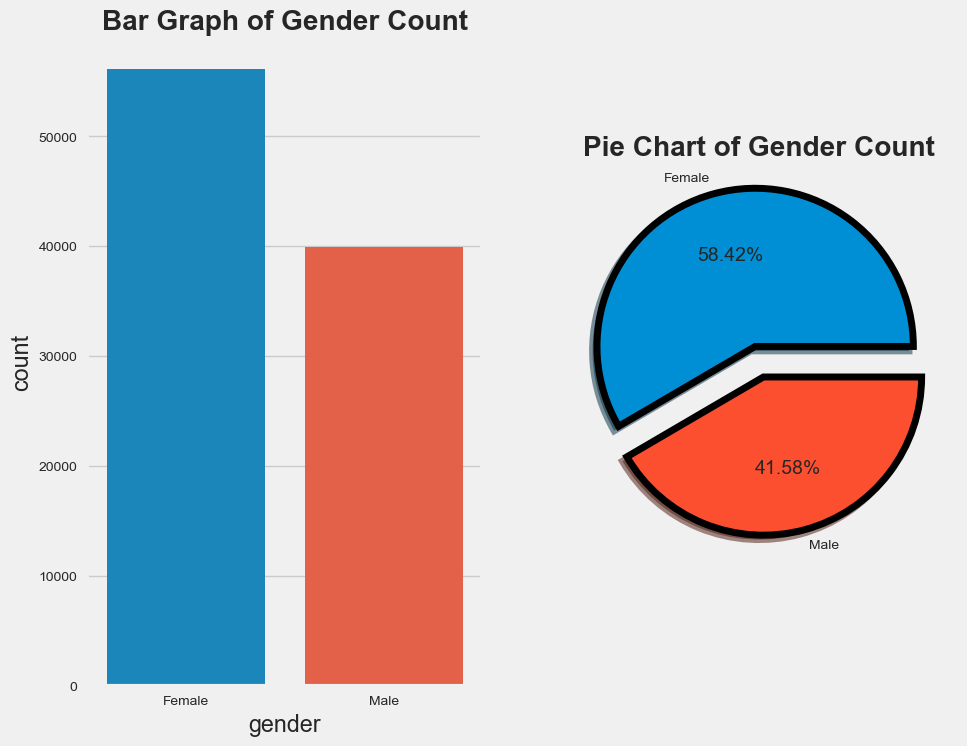

In [39]:
plt.style.use('fivethirtyeight')
plt.subplots(figsize= (10,8))
plt.subplot(1 , 2 ,1)
sns.countplot(x = 'gender' , data =df)
plt.title("Bar Graph of Gender Count" , weight = 'bold')
plt.xticks(np.arange(2) , ['Female' , 'Male'])
plt.subplot(1 , 2 ,2)
plt.pie(percentage, labels = lab, autopct = '%0.2f%%' , explode = (0.1 , 0.1) , shadow = True , wedgeprops = {'edgecolor': 'black' ,'linewidth' : 5})
plt.title("Pie Chart of Gender Count" , weight = 'bold')
plt.savefig('FirstImage')
plt.show()

In [40]:
#Age column

<AxesSubplot:xlabel='age', ylabel='Count'>

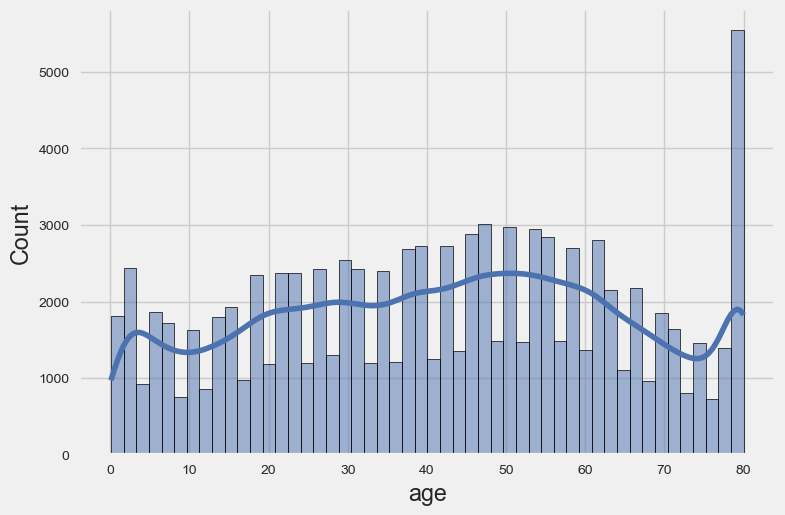

In [41]:
plt.style.use('fivethirtyeight')
sns.histplot(x = 'age' , data = df, kde = True , bins = 50 , ec = 'Black')

<AxesSubplot:xlabel='age'>

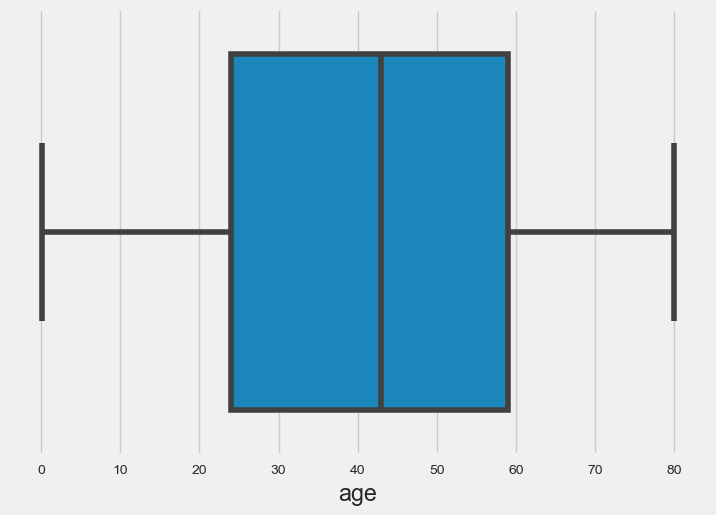

In [42]:
sns.boxplot(x = 'age' , data = df)

In [43]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

In [44]:
df['hypertension'].value_counts()

0    88667
1     7461
Name: hypertension, dtype: int64

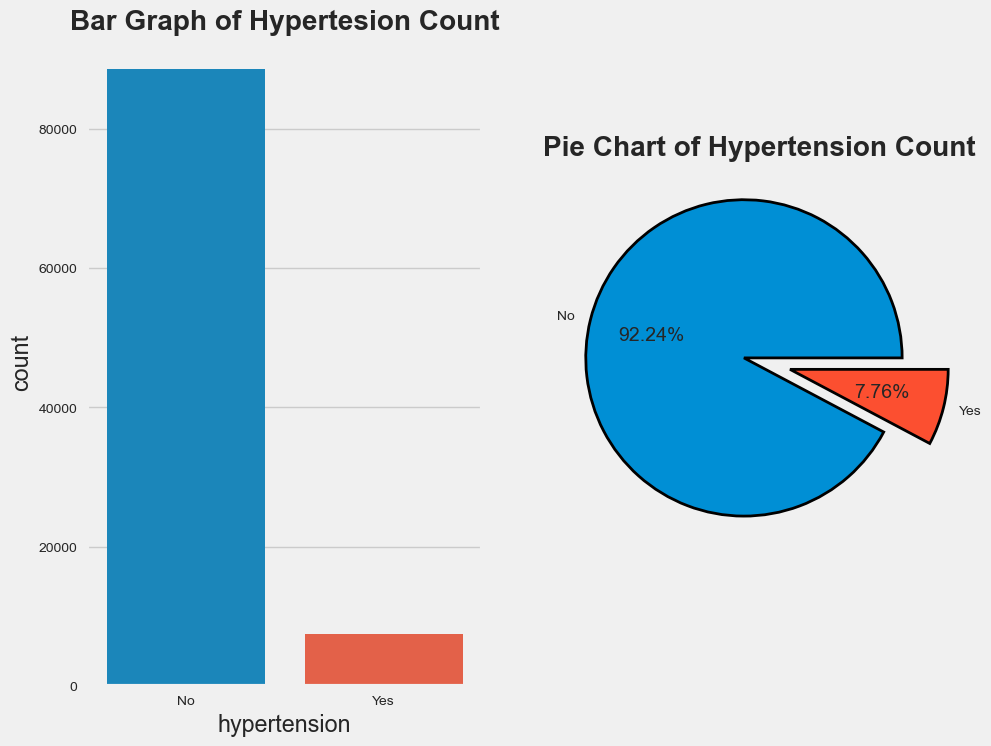

In [45]:
percentage = df['hypertension'].value_counts()
lab = ['No' , 'Yes']
plt.style.use('fivethirtyeight')
plt.subplots(figsize= (10,8))
plt.subplot(1 , 2 ,1)
sns.countplot(x = 'hypertension' , data =df)
plt.title("Bar Graph of Hypertesion Count" , weight = 'bold')
plt.xticks(np.arange(2) , ['No' , 'Yes'])
plt.subplot(1 , 2 ,2)
plt.pie(percentage, labels = lab, autopct = '%0.2f%%' , explode = (0.1, 0.2) , shadow = False , wedgeprops={'edgecolor' : 
                                                                                                           'black' , 'linewidth' : 2})
plt.title("Pie Chart of Hypertension Count" , weight = 'bold')
# plt.savefig('FirstImage')
plt.show()

In [46]:
df['heart_disease'].value_counts()

0    92205
1     3923
Name: heart_disease, dtype: int64

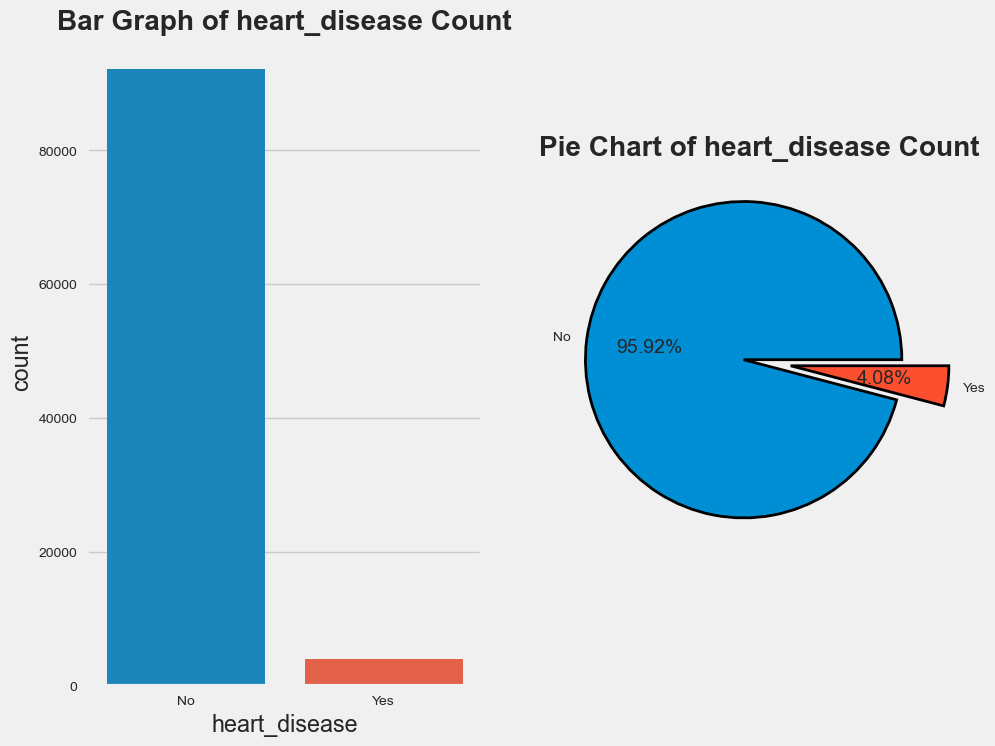

In [47]:
percentage = df['heart_disease'].value_counts()
lab = ['No' , 'Yes']
plt.style.use('fivethirtyeight')
plt.subplots(figsize= (10,8))
plt.subplot(1 , 2 ,1)
sns.countplot(x = 'heart_disease' , data =df)
plt.title("Bar Graph of heart_disease Count" , weight = 'bold')
plt.xticks(np.arange(2) , ['No' , 'Yes'])
plt.subplot(1 , 2 ,2)
plt.pie(percentage, labels = lab, autopct = '%0.2f%%' , explode = (0.1, 0.2) , shadow = False , wedgeprops={'edgecolor' : 
                                                                                                           'black' , 'linewidth' : 2})
plt.title("Pie Chart of heart_disease Count" , weight = 'bold')
# plt.savefig('FirstImage')
plt.show()

In [48]:
df['smoking_history'].value_counts()

0    34395
1    32881
3     9299
2     9197
5     6359
4     3997
Name: smoking_history, dtype: int64

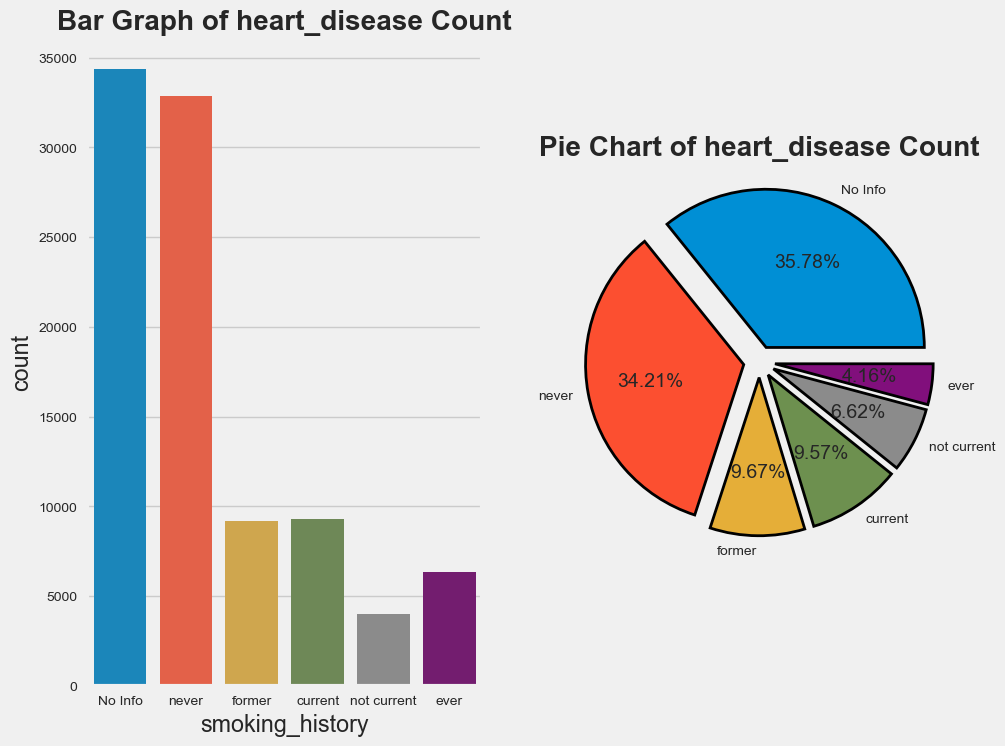

In [49]:
percentage = df['smoking_history'].value_counts()
lab = ['No Info', 'never', 'former', 'current', 'not current', 'ever']
plt.style.use('fivethirtyeight')
plt.subplots(figsize= (10,8))
plt.subplot(1 , 2 ,1)
sns.countplot(x = 'smoking_history' , data =df)
plt.title("Bar Graph of heart_disease Count" , weight = 'bold')
plt.xticks(np.arange(6) , ['No Info', 'never', 'former', 'current', 'not current', 'ever'])
plt.subplot(1 , 2 ,2)
plt.pie(percentage, labels = lab, autopct = '%0.2f%%' , explode = (0.1, 0.1 , 0.1, 0.1 ,0.1 , 0.1) , shadow = False , wedgeprops={'edgecolor' : 
                                                                                                           'black' , 'linewidth' : 2})
plt.title("Pie Chart of heart_disease Count" , weight = 'bold')
# plt.savefig('FirstImage')
plt.show()

In [50]:
#bmi

<AxesSubplot:xlabel='bmi', ylabel='Count'>

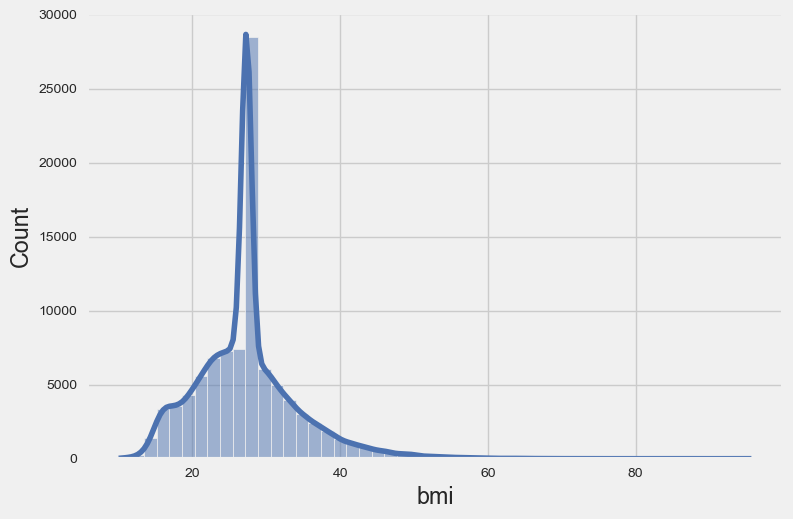

In [51]:
sns.histplot(x = 'bmi' , data = df, bins = 50 , kde = True)

<AxesSubplot:xlabel='bmi'>

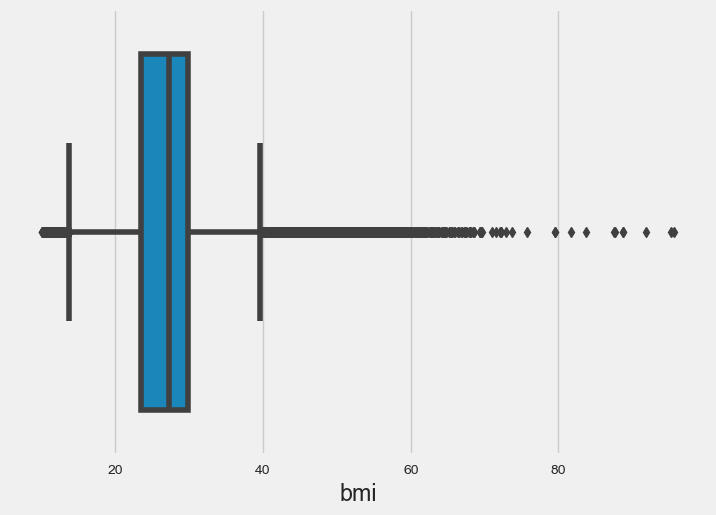

In [52]:
sns.boxplot(x = 'bmi' , data = df)

In [53]:
#HbA1c_level

<AxesSubplot:xlabel='HbA1c_level', ylabel='Count'>

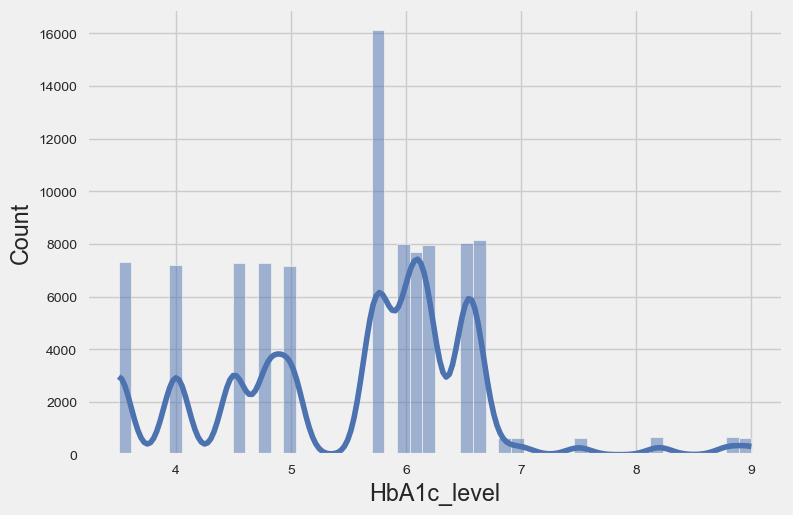

In [54]:
sns.histplot(x = 'HbA1c_level' , data = df, bins = 50 , kde = True)

<AxesSubplot:xlabel='HbA1c_level'>

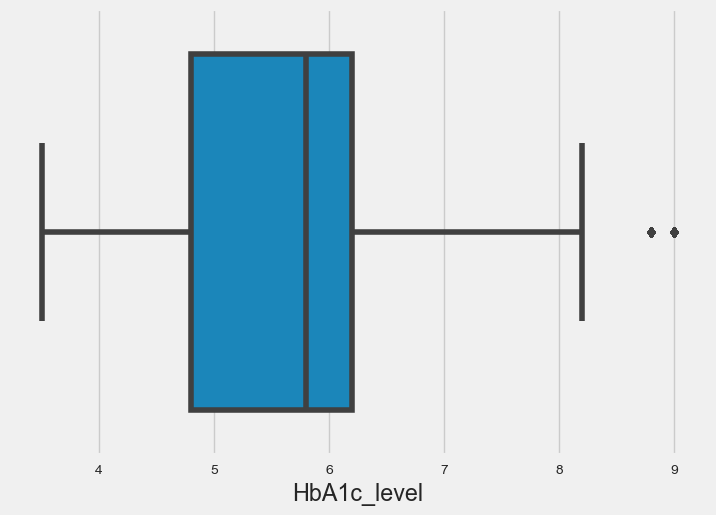

In [55]:
sns.boxplot(x = 'HbA1c_level' , data = df)

In [56]:
#blood_glucose_level

<AxesSubplot:xlabel='blood_glucose_level', ylabel='Count'>

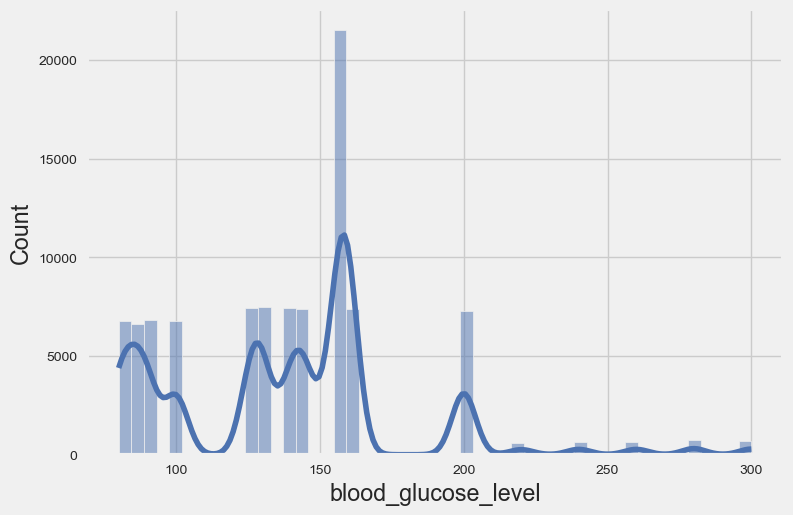

In [57]:
sns.histplot(x = 'blood_glucose_level' , data = df, bins = 50 , kde = True)

<AxesSubplot:xlabel='blood_glucose_level'>

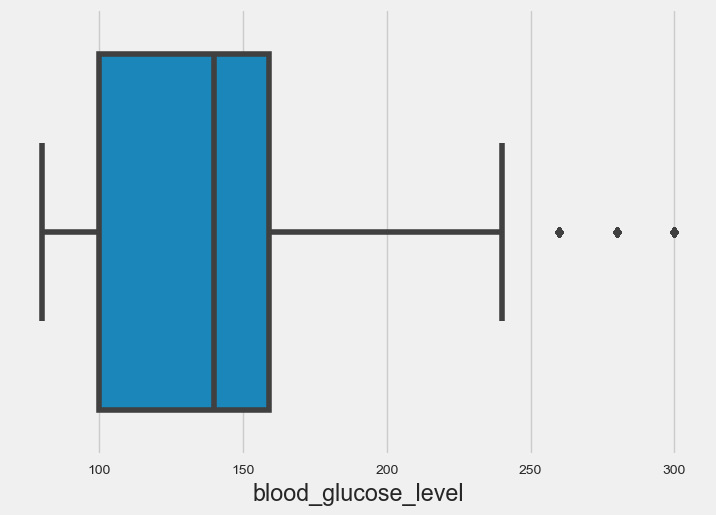

In [58]:
sns.boxplot(x = 'blood_glucose_level' , data = df)

In [59]:
#diabetes

In [60]:
df['diabetes'].value_counts()

0    87646
1     8482
Name: diabetes, dtype: int64

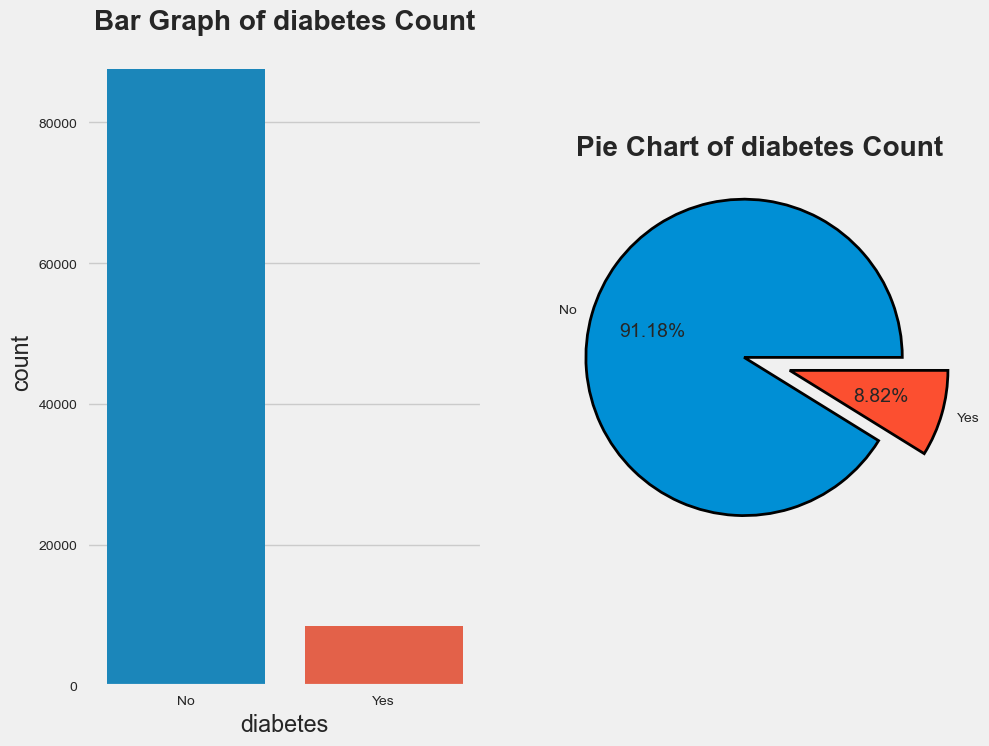

In [61]:
percentage = df['diabetes'].value_counts()
lab = ['No' , 'Yes']
plt.style.use('fivethirtyeight')
plt.subplots(figsize= (10,8))
plt.subplot(1 , 2 ,1)
sns.countplot(x = 'diabetes' , data =df)
plt.title("Bar Graph of diabetes Count" , weight = 'bold')
plt.xticks(np.arange(2) , ['No' , 'Yes'])
plt.subplot(1 , 2 ,2)
plt.pie(percentage, labels = lab, autopct = '%0.2f%%' , explode = (0.1, 0.2) , shadow = False , wedgeprops={'edgecolor' : 
                                                                                                           'black' , 'linewidth' : 2})
plt.title("Pie Chart of diabetes Count" , weight = 'bold')
# plt.savefig('FirstImage')
plt.show()

### Conclusion -> Dataset is Imbalanced (Diabetes o/p)
 ### outliers in Some columns -> bmi , HbA1c_level , blood_glucose_level

In [62]:
#first we remove the outliers

In [63]:
test = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
z = (test - np.mean(test)) / np.std(test)

In [64]:
df = df[(z < 3).all(axis = 1)]

In [65]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,1,24.60,4.8,145,0
99996,0,2.0,0,0,1,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [66]:
#Again displaying the box plot 

<AxesSubplot:xlabel='age'>

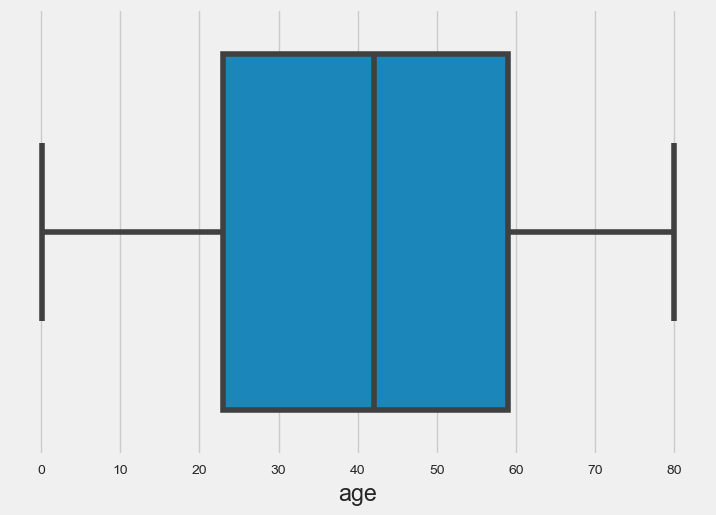

In [67]:
sns.boxplot(x = 'age' , data = df)

<AxesSubplot:xlabel='bmi'>

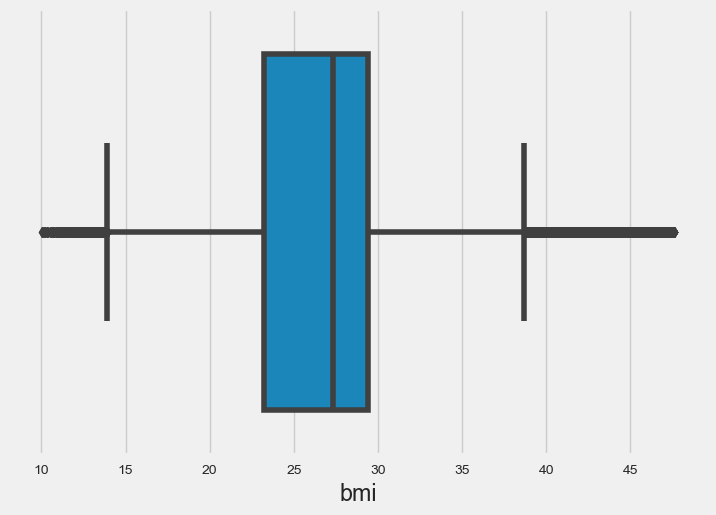

In [68]:
sns.boxplot(x = 'bmi' , data = df)

<AxesSubplot:xlabel='HbA1c_level'>

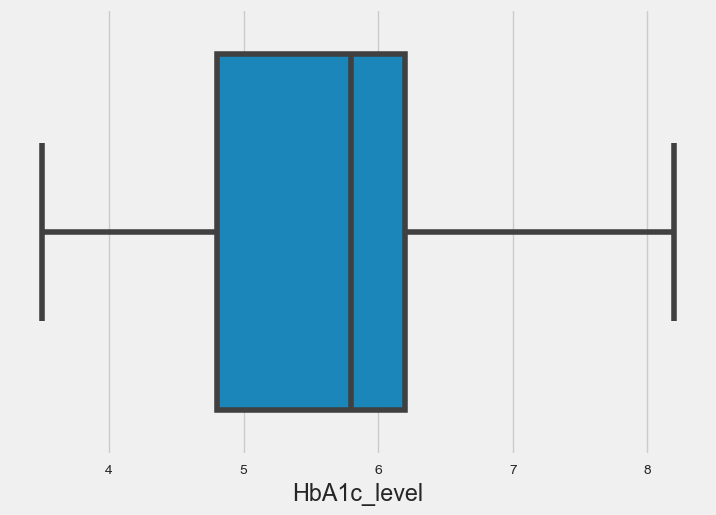

In [69]:
sns.boxplot(x = 'HbA1c_level' , data = df)

<AxesSubplot:xlabel='blood_glucose_level'>

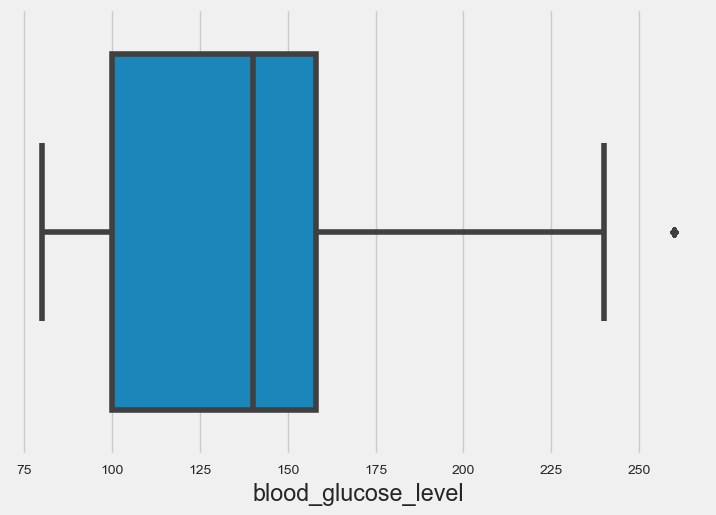

In [70]:
sns.boxplot(x = 'blood_glucose_level' , data = df)

In [71]:
# df_majority = df[df['diabetes'] == 0]
# df_minority = df[df['diabetes'] == 1]

In [72]:
#Balancing the dataset using SMOTE technique

In [73]:
from sklearn.utils import resample

In [74]:
# df_minority_sample = resample(
#         df_minority,
#         replace = True,
#         n_samples = len(df_majority))

In [75]:
# df = pd.concat([df_minority_sample, df_majority])

In [76]:
# df['diabetes'].value_counts()

In [77]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0


In [78]:
#Exploring the Categorical Columns

In [79]:
pd.crosstab(df['diabetes'] , df['smoking_history'] , normalize = 'columns') * 100

smoking_history,0,1,2,3,4,5
diabetes,,,,,,
0,93.112338,96.985595,92.964652,87.323296,91.472055,92.456256
1,6.887662,3.014405,7.035348,12.676704,8.527945,7.543744


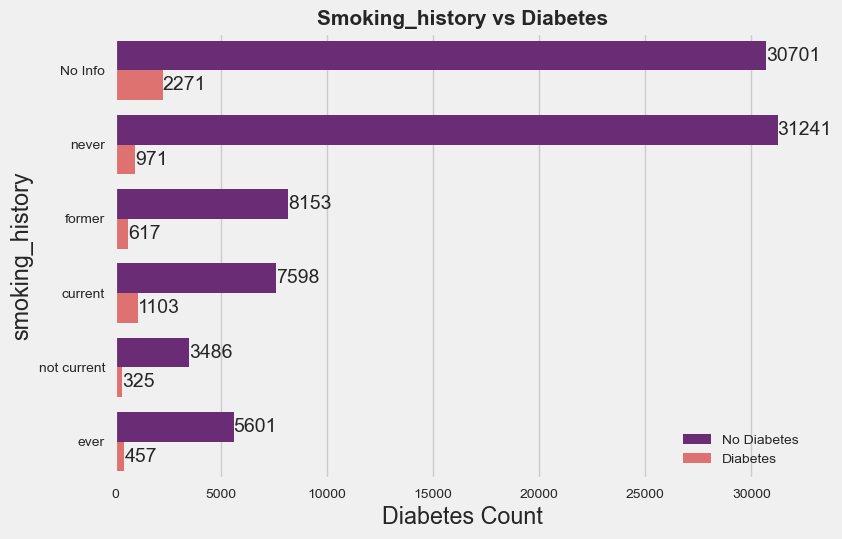

In [80]:
ax = sns.countplot(y = 'smoking_history' , hue = 'diabetes', data = df , palette =  'magma')
plt.title('Smoking_history vs Diabetes' , fontsize = 15 , weight = 'bold')
plt.xlabel("Diabetes Count")
plt.legend(labels = ['No Diabetes' , "Diabetes"])
plt.yticks(np.arange(6) , ['No Info', 'never', 'former', 'current', 'not current', 'ever'])
for i in ax.containers:
    ax.bar_label(i)

In [81]:
pd.crosstab(df['diabetes'] , df['gender'] , normalize = 'columns') * 100

gender,0,1
diabetes,,
0,94.490898,92.809608
1,5.509102,7.190392


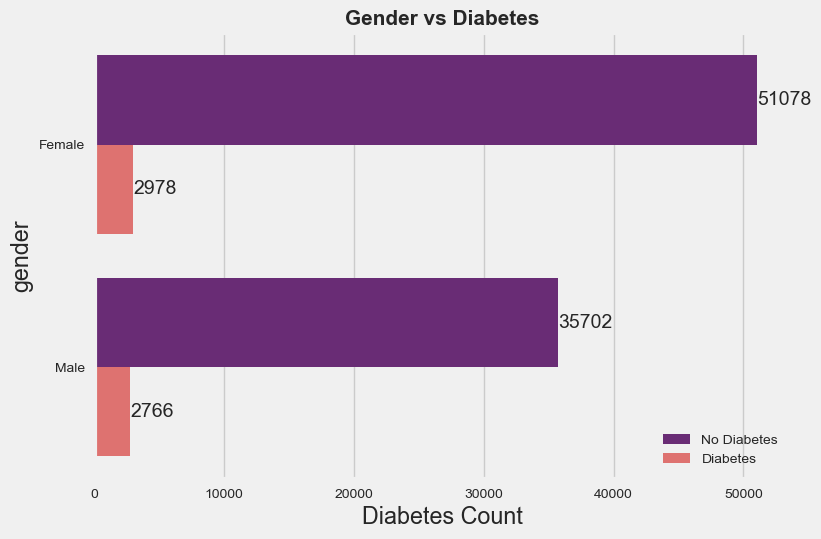

In [82]:
ax = sns.countplot(y = 'gender' , hue = 'diabetes', data = df , palette =  'magma')
plt.title('Gender vs Diabetes' , fontsize = 15 , weight = 'bold')
plt.xlabel("Diabetes Count")
plt.legend(labels = ['No Diabetes' , "Diabetes"])
plt.yticks(np.arange(2) , ['Female' , 'Male'])
for i in ax.containers:
    ax.bar_label(i)

<AxesSubplot:xlabel='age', ylabel='Density'>

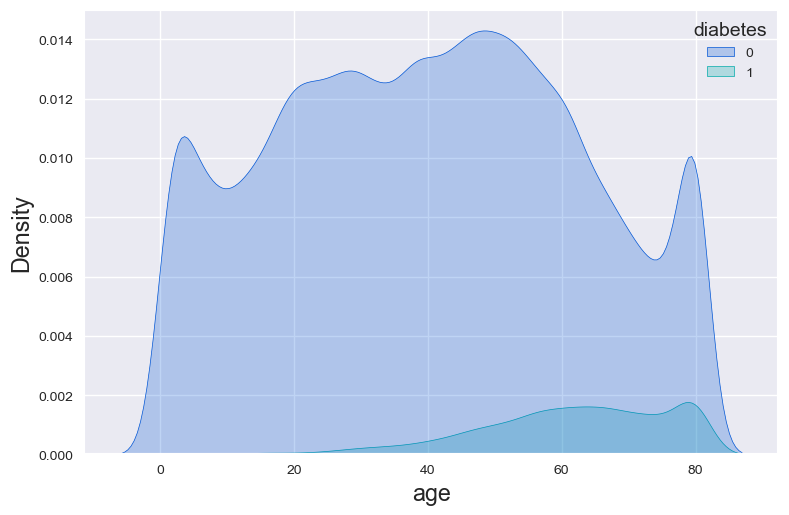

In [83]:
sns.set_style('darkgrid')
sns.kdeplot(x = 'age' , data = df , palette = 'winter' , hue = 'diabetes' , fill = True)

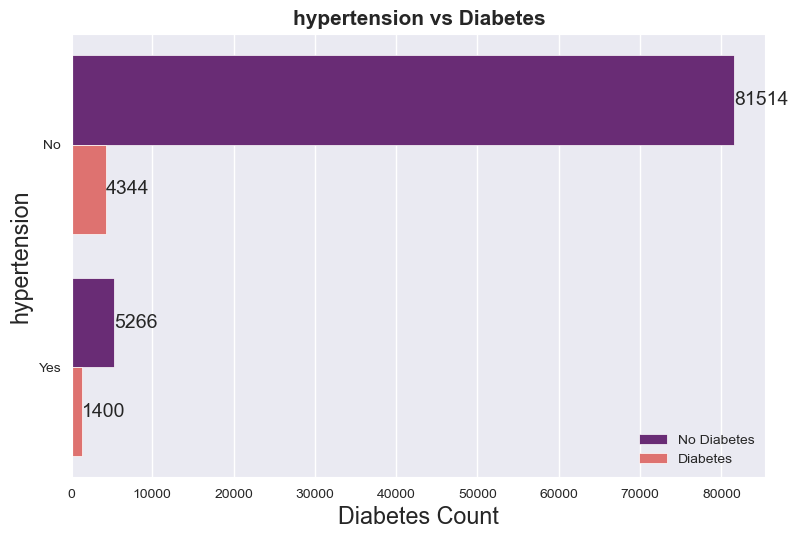

In [84]:
ax = sns.countplot(y = 'hypertension' , hue = 'diabetes', data = df , palette =  'magma')
plt.title('hypertension vs Diabetes' , fontsize = 15 , weight = 'bold')
plt.xlabel("Diabetes Count")
plt.legend(labels = ['No Diabetes' , "Diabetes"])
plt.yticks(np.arange(2) , ['No' , 'Yes'])
for i in ax.containers:
    ax.bar_label(i)

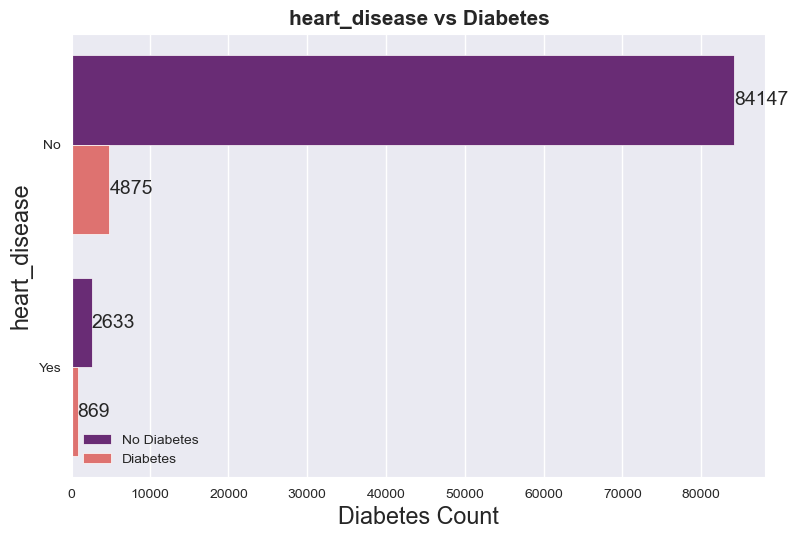

In [85]:
ax = sns.countplot(y = 'heart_disease' , hue = 'diabetes', data = df , palette =  'magma')
plt.title('heart_disease vs Diabetes' , fontsize = 15 , weight = 'bold')
plt.xlabel("Diabetes Count")
plt.legend(labels = ['No Diabetes' , "Diabetes"])
plt.yticks(np.arange(2) , ['No' , 'Yes'])
for i in ax.containers:
    ax.bar_label(i)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

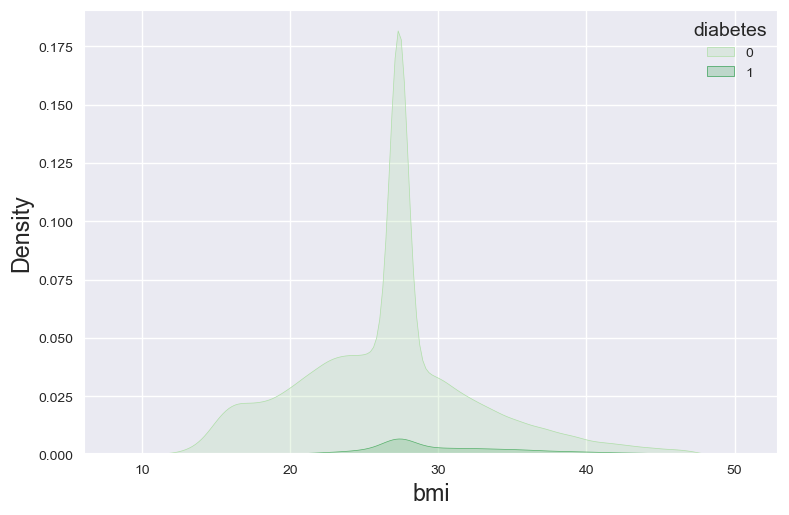

In [86]:
sns.set_style('darkgrid')
sns.kdeplot(x = 'bmi' , hue = 'diabetes' , palette = 'Greens' , data = df , fill = True)

<AxesSubplot:xlabel='HbA1c_level', ylabel='Density'>

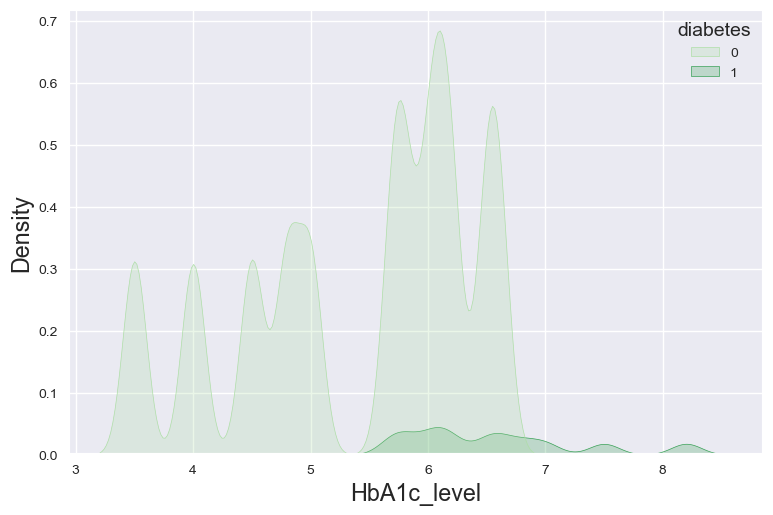

In [87]:
sns.set_style('darkgrid')
sns.kdeplot(x = 'HbA1c_level' , hue = 'diabetes' , palette = 'Greens' , data = df , fill = True)

<AxesSubplot:xlabel='blood_glucose_level', ylabel='Density'>

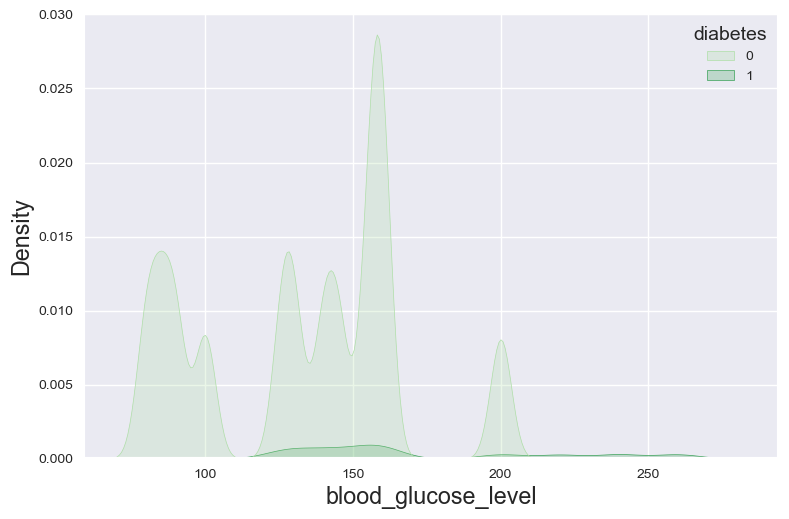

In [88]:
sns.set_style('darkgrid')
sns.kdeplot(x = 'blood_glucose_level' , hue = 'diabetes' , palette = 'Greens' , data = df , fill = True)

In [89]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.032594,0.013869,0.077912,0.051933,-0.011868,0.015140,0.011626,0.034340
age,-0.032594,1.000000,0.255185,0.234349,0.149128,0.376465,0.064051,0.067972,0.229485
hypertension,0.013869,0.255185,1.000000,0.120405,0.029756,0.141845,0.049289,0.052875,0.170830
heart_disease,0.077912,0.234349,0.120405,1.000000,0.068490,0.064993,0.041810,0.041666,0.152935
smoking_history,0.051933,0.149128,0.029756,0.068490,1.000000,0.073097,0.013918,0.011017,0.047764
bmi,-0.011868,0.376465,0.141845,0.064993,0.073097,1.000000,0.049728,0.053048,0.178912
HbA1c_level,0.015140,0.064051,0.049289,0.041810,0.013918,0.049728,1.000000,0.081266,0.285200
blood_glucose_level,0.011626,0.067972,0.052875,0.041666,0.011017,0.053048,0.081266,1.000000,0.284409
diabetes,0.034340,0.229485,0.170830,0.152935,0.047764,0.178912,0.285200,0.284409,1.000000


<AxesSubplot:>

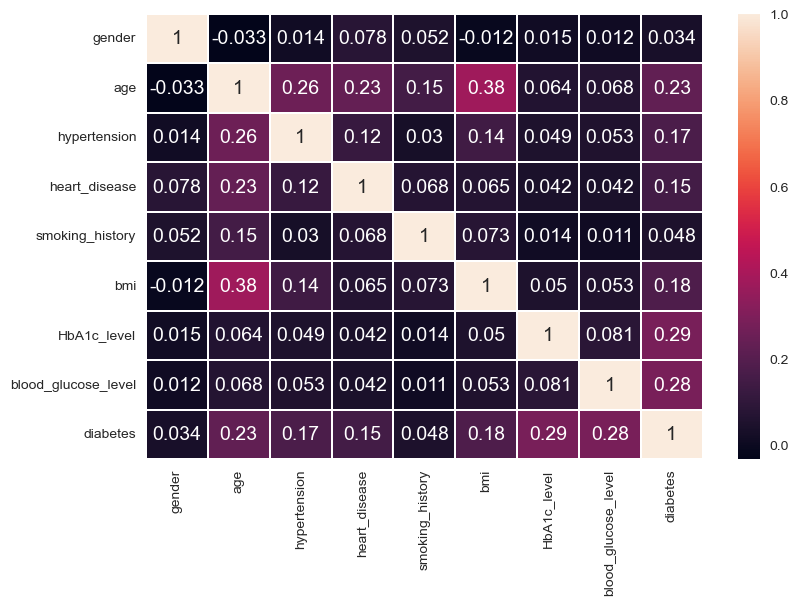

In [90]:
sns.heatmap(df.corr() , annot = True , linewidths= 0.2)

In [91]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0


In [92]:
df['age'] = df['age'].astype(int)

In [93]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25.19,6.6,140,0
1,0,54,0,0,1,27.32,6.6,80,0


In [94]:
#Now Model Traning

In [95]:
#Dividing dataset into dependent and independent features

In [96]:
X = df.iloc[: , :-1]

In [97]:
y = df.iloc[:,-1]

In [98]:
X.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80,0,1,0,25.19,6.6,140
1,0,54,0,0,1,27.32,6.6,80


In [99]:
y.head(2)

0    0
1    0
Name: diabetes, dtype: int64

In [100]:
#now dividing dataset into traning and testing data

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , random_state=42)

In [103]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((64766, 8), (27758, 8), (64766,), (27758,))

In [104]:
#now model traning

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
classifier = LogisticRegression()

In [107]:
classifier.fit(X_train , y_train)

LogisticRegression()

In [108]:
classifier.predict_proba(X_test)

array([[9.97798221e-01, 2.20177941e-03],
       [9.93989434e-01, 6.01056567e-03],
       [9.93823301e-01, 6.17669950e-03],
       ...,
       [7.86801162e-01, 2.13198838e-01],
       [9.89446354e-01, 1.05536455e-02],
       [9.99827950e-01, 1.72049510e-04]])

In [109]:
y_pred = classifier.predict(X_test)

In [110]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
pd.DataFrame(y_pred , columns = ['output']).value_counts()

output
0         26861
1           897
dtype: int64

In [112]:
#Performance matrix of model

In [113]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [114]:
print(confusion_matrix(y_pred , y_test))
print(accuracy_score(y_pred , y_test))
print(classification_report(y_pred , y_test))



[[25749  1112]
 [  245   652]]
0.9511131925931263
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     26861
           1       0.37      0.73      0.49       897

    accuracy                           0.95     27758
   macro avg       0.68      0.84      0.73     27758
weighted avg       0.97      0.95      0.96     27758



In [115]:
#hyperparameter tunning

In [116]:
#using gridsearchCV

In [117]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [118]:
log_reg  = LogisticRegression()
Parameters = {'penalty' : ['l1', 'l2', 'elasticnet', None]  , 'C' : [1 , 10 , 20 , 30] , 'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
clf = GridSearchCV(log_reg , param_grid= Parameters , cv = 5)

In [ ]:
clf.fit(X_train , y_train)